In [ ]:
# Importing the neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the data set provided

train_df = pd.read_csv('train.csv')

In [ ]:
# Making a copy of the dataset so as to avoid changes/errors in actual dataset

df=train_df.copy()

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
#Correcting the column names 

df = df.rename(columns=lambda x: x.replace('_',''))

In [ ]:
# Adding both ApplicantIncome and CoapplicantIncome to TotalIncome column

df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [ ]:
#Looking at the missing values in the dataset

df.isnull().sum()

LoanID                0
Gender               13
Married               3
Dependents           15
Education             0
SelfEmployed         32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
LoanAmountTerm       14
CreditHistory        50
PropertyArea          0
LoanStatus            0
TotalIncome           0
dtype: int64

In [ ]:
# Filling the data using forward fill to avoid biasing

df['Gender'].fillna(method='ffill',axis=0,inplace=True)
df['Married'].fillna(method='ffill',axis=0,inplace=True)

In [ ]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
# Going with the max occuring data

df['Dependents'].fillna('0',inplace=True)

In [ ]:
df['Dependents'].value_counts()

0     345
2     116
1     102
3+     51
Name: Dependents, dtype: int64

In [ ]:
df['SelfEmployed'].value_counts()

No     500
Yes     82
Name: SelfEmployed, dtype: int64

In [ ]:
# Going with the max occuring data

df['SelfEmployed'].fillna('No',inplace=True)

<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

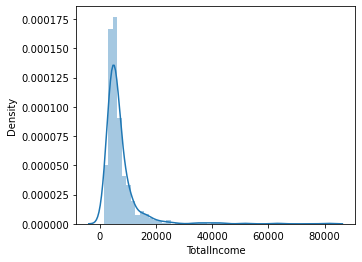

In [ ]:
#Checking the density of Total Income

fig = plt.figure(figsize=(5,4))
sns.distplot(df['TotalIncome'])

In [ ]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

(0.0, 800.0)

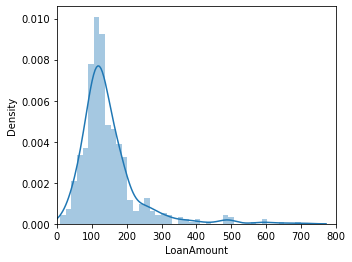

In [ ]:
# Checking density of Loan Amount

fig = plt.figure(figsize=(5,4))
sns.distplot(df['LoanAmount'])
plt.xlim(0,800)

In [ ]:
# Excluding the outliers and finding mean

a=df.LoanAmount[df.LoanAmount>30]
amt=df.LoanAmount[df.LoanAmount<260]
amt.mean()

127.78284671532846

In [ ]:
# Filling the rest of the applicants' Loan Amount data with the average amount

df['LoanAmount'].fillna(127.7,inplace=True)

In [ ]:
df['LoanAmountTerm'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: LoanAmountTerm, dtype: int64

In [ ]:
# It is seen that people take Loan Amount Term as 30 years or 360 months

df['LoanAmountTerm'].fillna(360.0,inplace=True)

In [ ]:
# Going with max occuring data 

df['CreditHistory'].fillna(1.0,inplace=True)

In [ ]:
df.isnull().sum()

LoanID               0
Gender               0
Married              0
Dependents           0
Education            0
SelfEmployed         0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
LoanAmountTerm       0
CreditHistory        0
PropertyArea         0
LoanStatus           0
TotalIncome          0
dtype: int64

<AxesSubplot:>

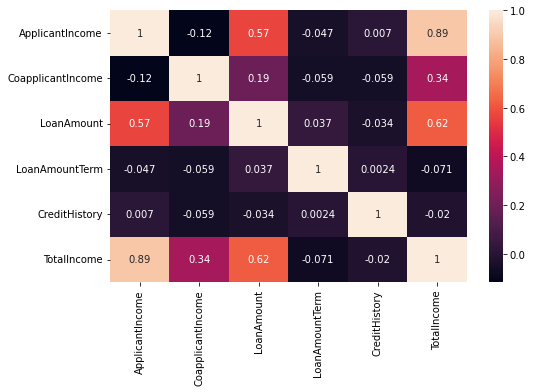

In [ ]:
# Checking for correlation between data

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

Since Loan Amount and Total Income are somewhat related it shows that people are applying for the amount which they can pay easily..basically playing safe.

In [ ]:
features = ['Gender','Married','Dependents','Education','SelfEmployed','CreditHistory','PropertyArea']

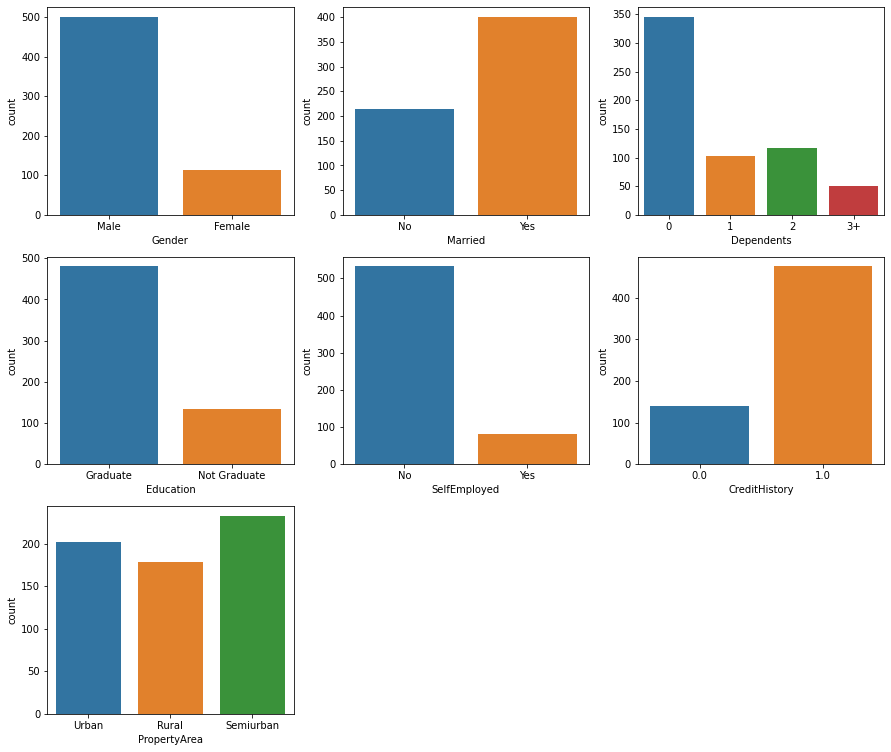

In [ ]:
# Plotting graphs to understand the ratio of people

fig = plt.figure(figsize=(15,13))
for column, feature in enumerate(features):
    fig.add_subplot(3,3,column+1)
    sns.countplot(data=df,x=feature)

Findings..
1. Males are applying more for loans than females

2. Married people are applying more for loans than unmarried

3. Graduate people are applying more for loans

4. People with 0 dependents are applying more for loans

5. People from service sector are applying more for loans

6. People are taking loan term for 360 months ie 30 years

7. People who are meeting the credit history guidelines are applying more for loans

8. More people from semi urban area are applying for loans

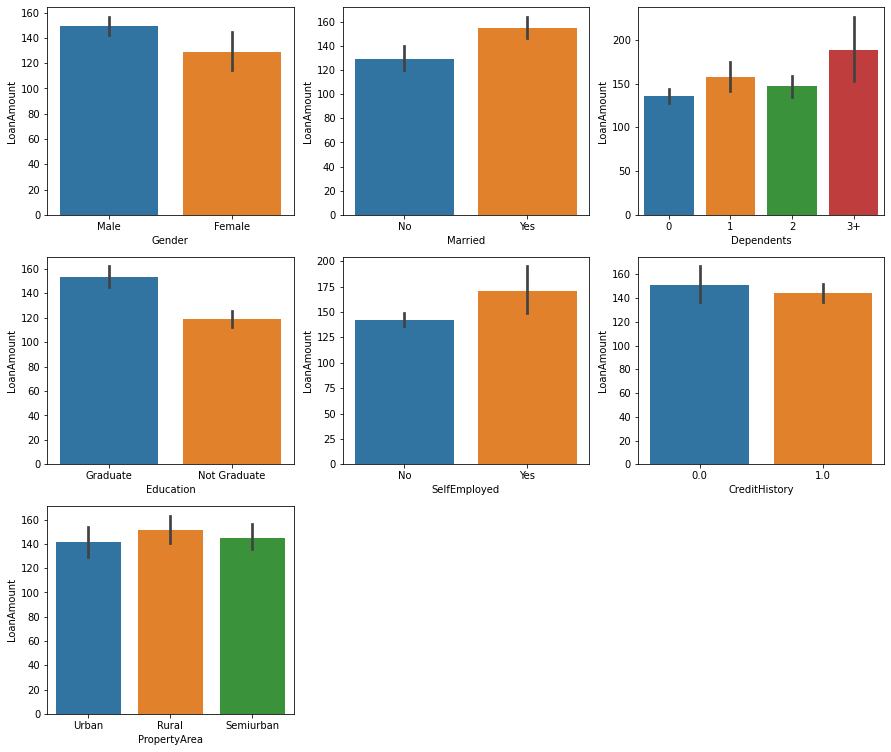

In [ ]:
# Plotting graphs to understand relationship between Loan Amounts and type of people

fig = plt.figure(figsize=(15,13))
for column, feature in enumerate(features):
    fig.add_subplot(3,3,column+1)
    sns.barplot(data=df,y='LoanAmount',x=feature)

Findings..

1. Males are applying more for loans that too for higher amounts

2. Graduated people are applying more for loans that too for higher amounts

3. Married people are applying more for loans that too for higher amounts

4. People who have 3+ dependies on them apply for higher amount loans but are least in number

5. Rural people apply for higher amount loans but are less than semi urban people

6. Self Employed people apply for higher amount loans but are less in number

7. People who don't meet Credit History guidelines are applying for higher amount loans


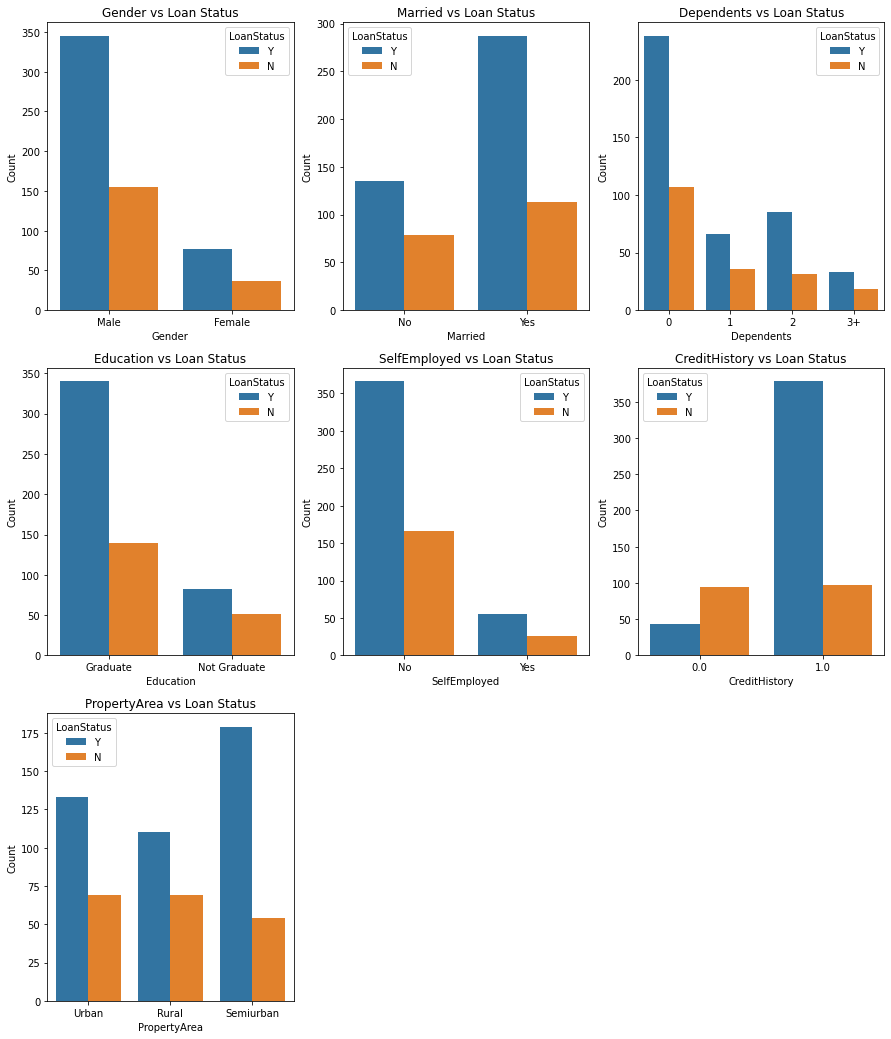

In [ ]:
# Plotting graphs to understand the ratio of people who actually got loan approved

fig = plt.figure(figsize=(15,18))
for column, feature in enumerate(features):
    fig.add_subplot(3,3,column+1)
    sns.countplot(x=feature, hue='LoanStatus',data=df)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('{} vs Loan Status'.format(feature))      

In [ ]:
# Made a function to get above graph values in numeric form

def get_values(var):
    temp=pd.crosstab(df[var],df['LoanStatus'],margins=True)
    print(temp)

In [ ]:
get_values('PropertyArea')

LoanStatus      N    Y  All
PropertyArea               
Rural          69  110  179
Semiurban      54  179  233
Urban          69  133  202
All           192  422  614


Loan will be preferrably given to those..

who have Credit History

with higher Total Incomes (Applicant + Coapplicant)

who work in service sector

who have 0 dependies

with higher Education levels

who have Property Area as urban

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanID             614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   SelfEmployed       614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   LoanAmountTerm     614 non-null    float64
 10  CreditHistory      614 non-null    float64
 11  PropertyArea       614 non-null    object 
 12  LoanStatus         614 non-null    object 
 13  TotalIncome        614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


In [ ]:
# Dropping the unnecessary columns

df = df.drop(['ApplicantIncome','CoapplicantIncome','LoanID'],axis=1)
df

,Gender,Married,Dependents,Education,SelfEmployed,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus,TotalIncome
0,1,0,0,0,0,127.7,360.0,1,2,Y,5849.0
1,1,1,1,0,0,128.0,360.0,1,0,N,6091.0
2,1,1,0,0,1,66.0,360.0,1,2,Y,3000.0
3,1,1,0,1,0,120.0,360.0,1,2,Y,4941.0
4,1,0,0,0,0,141.0,360.0,1,2,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.0,360.0,1,0,Y,2900.0
610,1,1,3,0,0,40.0,180.0,1,0,Y,4106.0
611,1,1,1,0,0,253.0,360.0,1,2,Y,8312.0
612,1,1,2,0,0,187.0,360.0,1,2,Y,7583.0


In [ ]:
# Splitting the data set

from sklearn.model_selection import train_test_split
train, test = train_test_split(df,train_size=0.7,random_state=42)
print(train.shape)
print(test.shape)

(429, 11)
(185, 11)


In [ ]:
y_train = train.pop('LoanStatus')
x_train = train

y_test = test.pop('LoanStatus')
x_test = test

In [ ]:
# Sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories.

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
lst=['Gender','Married','Dependents','Education','SelfEmployed','CreditHistory','PropertyArea']
for i in lst:
    le = preprocessing.LabelEncoder()
    df[i]=le.fit_transform(df[i].astype('str'))
 
df.dtypes

Gender              int32
Married             int32
Dependents          int32
Education           int32
SelfEmployed        int32
LoanAmount        float64
LoanAmountTerm    float64
CreditHistory       int32
PropertyArea        int32
LoanStatus         object
TotalIncome       float64
dtype: object

In [ ]:
# Scaling the data set

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scaler.fit_transform(x_test[x_test.columns])

In [ ]:
# Applying the Logistic Regression Model

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)
print('Accuracy of logistic regression classifier on test data set is: {:.2f}'.format(lr.score(x_test,y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy of logistic regression classifier on test data set is: 0.77
[[ 34  31]
 [ 12 108]]
